In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import sklearn.linear_model as sk_lm
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import random
from sklearn.utils import shuffle
from sklearn.model_selection  import train_test_split

import sklearn.linear_model as sk_lm

from sklearn.metrics import cohen_kappa_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


from sklearn import metrics



#import 
%matplotlib inline

Source:
    https://archive.ics.uci.edu/ml/datasets/bank+marketing

Abstract:
    The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [13]:
tot = pd.read_csv("/media/radial/Work/Work/Work on datasets/Banco*/bank-additional/bank-additional/bank-additional-full.csv", sep=";")
tot.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [9]:
tot.shape

(41188, 21)

In [64]:
tot.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [18]:
tot.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [55]:
plt.hist(tot.age, bins=10, rwidth=0.5)

(array([  1.66600000e+03,   1.13430000e+04,   1.20370000e+04,
          8.08700000e+03,   5.82300000e+03,   1.61300000e+03,
          3.18000000e+02,   2.02000000e+02,   8.90000000e+01,
          1.00000000e+01]),
 array([ 17. ,  25.1,  33.2,  41.3,  49.4,  57.5,  65.6,  73.7,  81.8,
         89.9,  98. ]),
 <a list of 10 Patch objects>)

In [63]:
tot["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [53]:
tot["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [52]:
tot["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [51]:
tot["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [50]:
tot["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [49]:
tot["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [48]:
tot["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [47]:
tot["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [39]:
tot["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

(array([  3.61190000e+04,   4.05900000e+03,   7.88000000e+02,
          1.55000000e+02,   4.00000000e+01,   1.20000000e+01,
          9.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([    0. ,   491.8,   983.6,  1475.4,  1967.2,  2459. ,  2950.8,
         3442.6,  3934.4,  4426.2,  4918. ]),
 <a list of 10 Patch objects>)

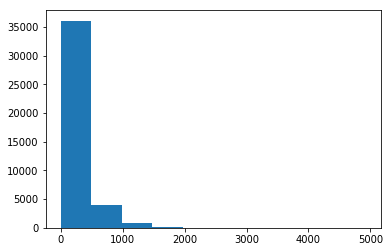

In [38]:
plt.hist(tot["duration"])

In [34]:
tot["campaign"].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [33]:
tot["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [32]:
tot["previous"].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [31]:
tot["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [29]:
tot["emp.var.rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [28]:
tot["cons.price.idx"].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [27]:
tot["cons.conf.idx"].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [17]:
plt.hist(tot.euribor3m, rwidth=0.5)

(array([  4.24200000e+03,   8.98500000e+03,   2.71000000e+02,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          7.00000000e+00,   2.95000000e+03,   6.49000000e+02,
          2.40830000e+04]),
 array([ 0.634 ,  1.0751,  1.5162,  1.9573,  2.3984,  2.8395,  3.2806,
         3.7217,  4.1628,  4.6039,  5.045 ]),
 <a list of 10 Patch objects>)

In [23]:
tot["nr.employed"].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [19]:
tot.y.value_counts() # imbalanced data 9:1 

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
tot.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [66]:
#too many unknowns,
#trying elminiation
d_e = copy.copy(tot)
d_e.shape

(41188, 21)

In [82]:
for i in d_e.columns[1:7]:
    d_e = d_e[~d_e[i].str.contains("unknown")]

In [83]:
d_e.shape

(30488, 21)

In [96]:
for i in d_e.columns:
    print(i)
    print(d_e[i].value_counts())

age
31    1643
32    1555
33    1524
30    1441
34    1431
35    1399
36    1391
29    1263
37    1140
39    1035
38    1033
41     906
28     809
40     807
42     793
43     741
27     699
44     677
48     670
45     664
46     659
47     600
26     599
50     552
49     516
52     506
25     500
53     469
51     460
54     432
      ... 
63      41
66      40
65      36
69      30
68      30
74      29
72      28
73      28
76      28
80      26
88      22
67      21
19      21
75      20
78      20
81      16
18      15
83      15
82      13
77      12
79      12
85       7
84       4
86       3
17       2
91       2
89       2
94       1
87       1
95       1
Name: age, dtype: int64
job
1     8737
2     5675
3     5473
4     2857
5     2311
6     1216
7     1092
8     1089
9      738
10     690
11     610
Name: job, dtype: int64
marital
married     17492
single       9443
divorced     3553
Name: marital, dtype: int64
education
university.degree      10412
high.school            

In [85]:
d_e.to_excel("/media/radial/Work/Work/Work on datasets/Banco*/without_unknowns.xlsx")

In [2]:
d_e = pd.read_excel("/media/radial/Work/Work/Work on datasets/Banco*/without_unknowns.xlsx")

In [118]:
d_e["job"] = d_e["job"].map({"admin.":1,"blue-collar"      :2,"technician"       :3,"services"         :4,"management"       :5,"retired"          :6,"self-employed"    :7,"entrepreneur"     :8,"unemployed"        :9,"housemaid"         :10,"student" :11 })

In [119]:
d_e["marital"] = d_e["marital"].map({"married":1,"single":2,"divorced":3})

In [121]:
d_e["education"] = d_e["education"].map({'basic.4y':1, 'high.school':2, 'basic.6y':3, 'professional.course':4,
       'basic.9y':5, 'university.degree':6, 'illiterate':7})

In [122]:
d_e.default = d_e.default.map({"no":1,"yes":2})

In [123]:
d_e.housing = d_e.housing.map({"no":1,"yes":2})

In [124]:
d_e.loan = d_e.loan.map({"no":1,"yes":2})

In [125]:
d_e.contact = d_e.contact.map({"telephone":1,"cellular":2})

In [127]:
d_e.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], dtype=object)

In [128]:
d_e.month = d_e.month.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4, 'sep':9})

In [131]:
d_e.day_of_week = d_e.day_of_week.map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})

In [135]:
d_e.poutcome = d_e.poutcome.map({'nonexistent':1, 'failure':2, 'success':3})

In [137]:
d_e.y = d_e.y.map({"no":1,"yes":2})

In [143]:
d_e.job = pd.Categorical(d_e.job)
d_e.marital = pd.Categorical(d_e.marital)
d_e.education = pd.Categorical(d_e.education)
d_e.default = pd.Categorical(d_e.default)
d_e.housing = pd.Categorical(d_e.housing)
d_e.loan = pd.Categorical(d_e.loan)
d_e.contact = pd.Categorical(d_e.contact)
d_e.month = pd.Categorical(d_e.month)
d_e.day_of_week = pd.Categorical(d_e.day_of_week)
d_e.poutcome = pd.Categorical(d_e.poutcome)
d_e.y = pd.Categorical(d_e.y)

d_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
age               30488 non-null int64
job               30488 non-null category
marital           30488 non-null category
education         30488 non-null category
default           30488 non-null category
housing           30488 non-null category
loan              30488 non-null category
contact           30488 non-null category
month             30488 non-null category
day_of_week       30488 non-null category
duration          30488 non-null int64
campaign          30488 non-null int64
pdays             30488 non-null int64
previous          30488 non-null int64
poutcome          30488 non-null category
emp.var.rate      30488 non-null float64
cons.price.idx    30488 non-null float64
cons.conf.idx     30488 non-null float64
euribor3m         30488 non-null float64
nr.employed       30488 non-null float64
y                 30488 non-null category
dtypes: category(11), float64

In [144]:
d_e.to_excel("/media/radial/Work/Work/Work on datasets/Banco*/without_unknowns_categorical.xlsx")

In [6]:
d_e = pd.read_excel("/media/radial/Work/Work/Work on datasets/Banco*/without_unknowns_categorical.xlsx")

In [145]:
d_e.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

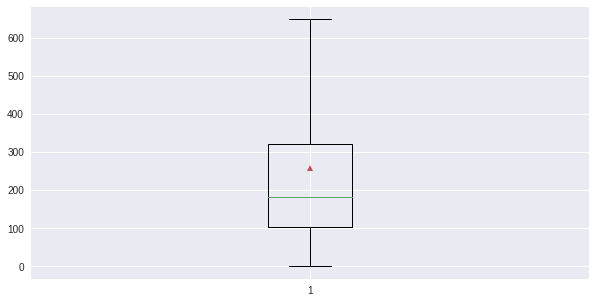

In [12]:
plt.boxplot(d_e.duration,showmeans=True,showfliers=False)
plt.show()
plt.boxplot(d_e.duration,showmeans=True,showfliers=True)
plt.show()

In [154]:
corrmat = d_e.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True)

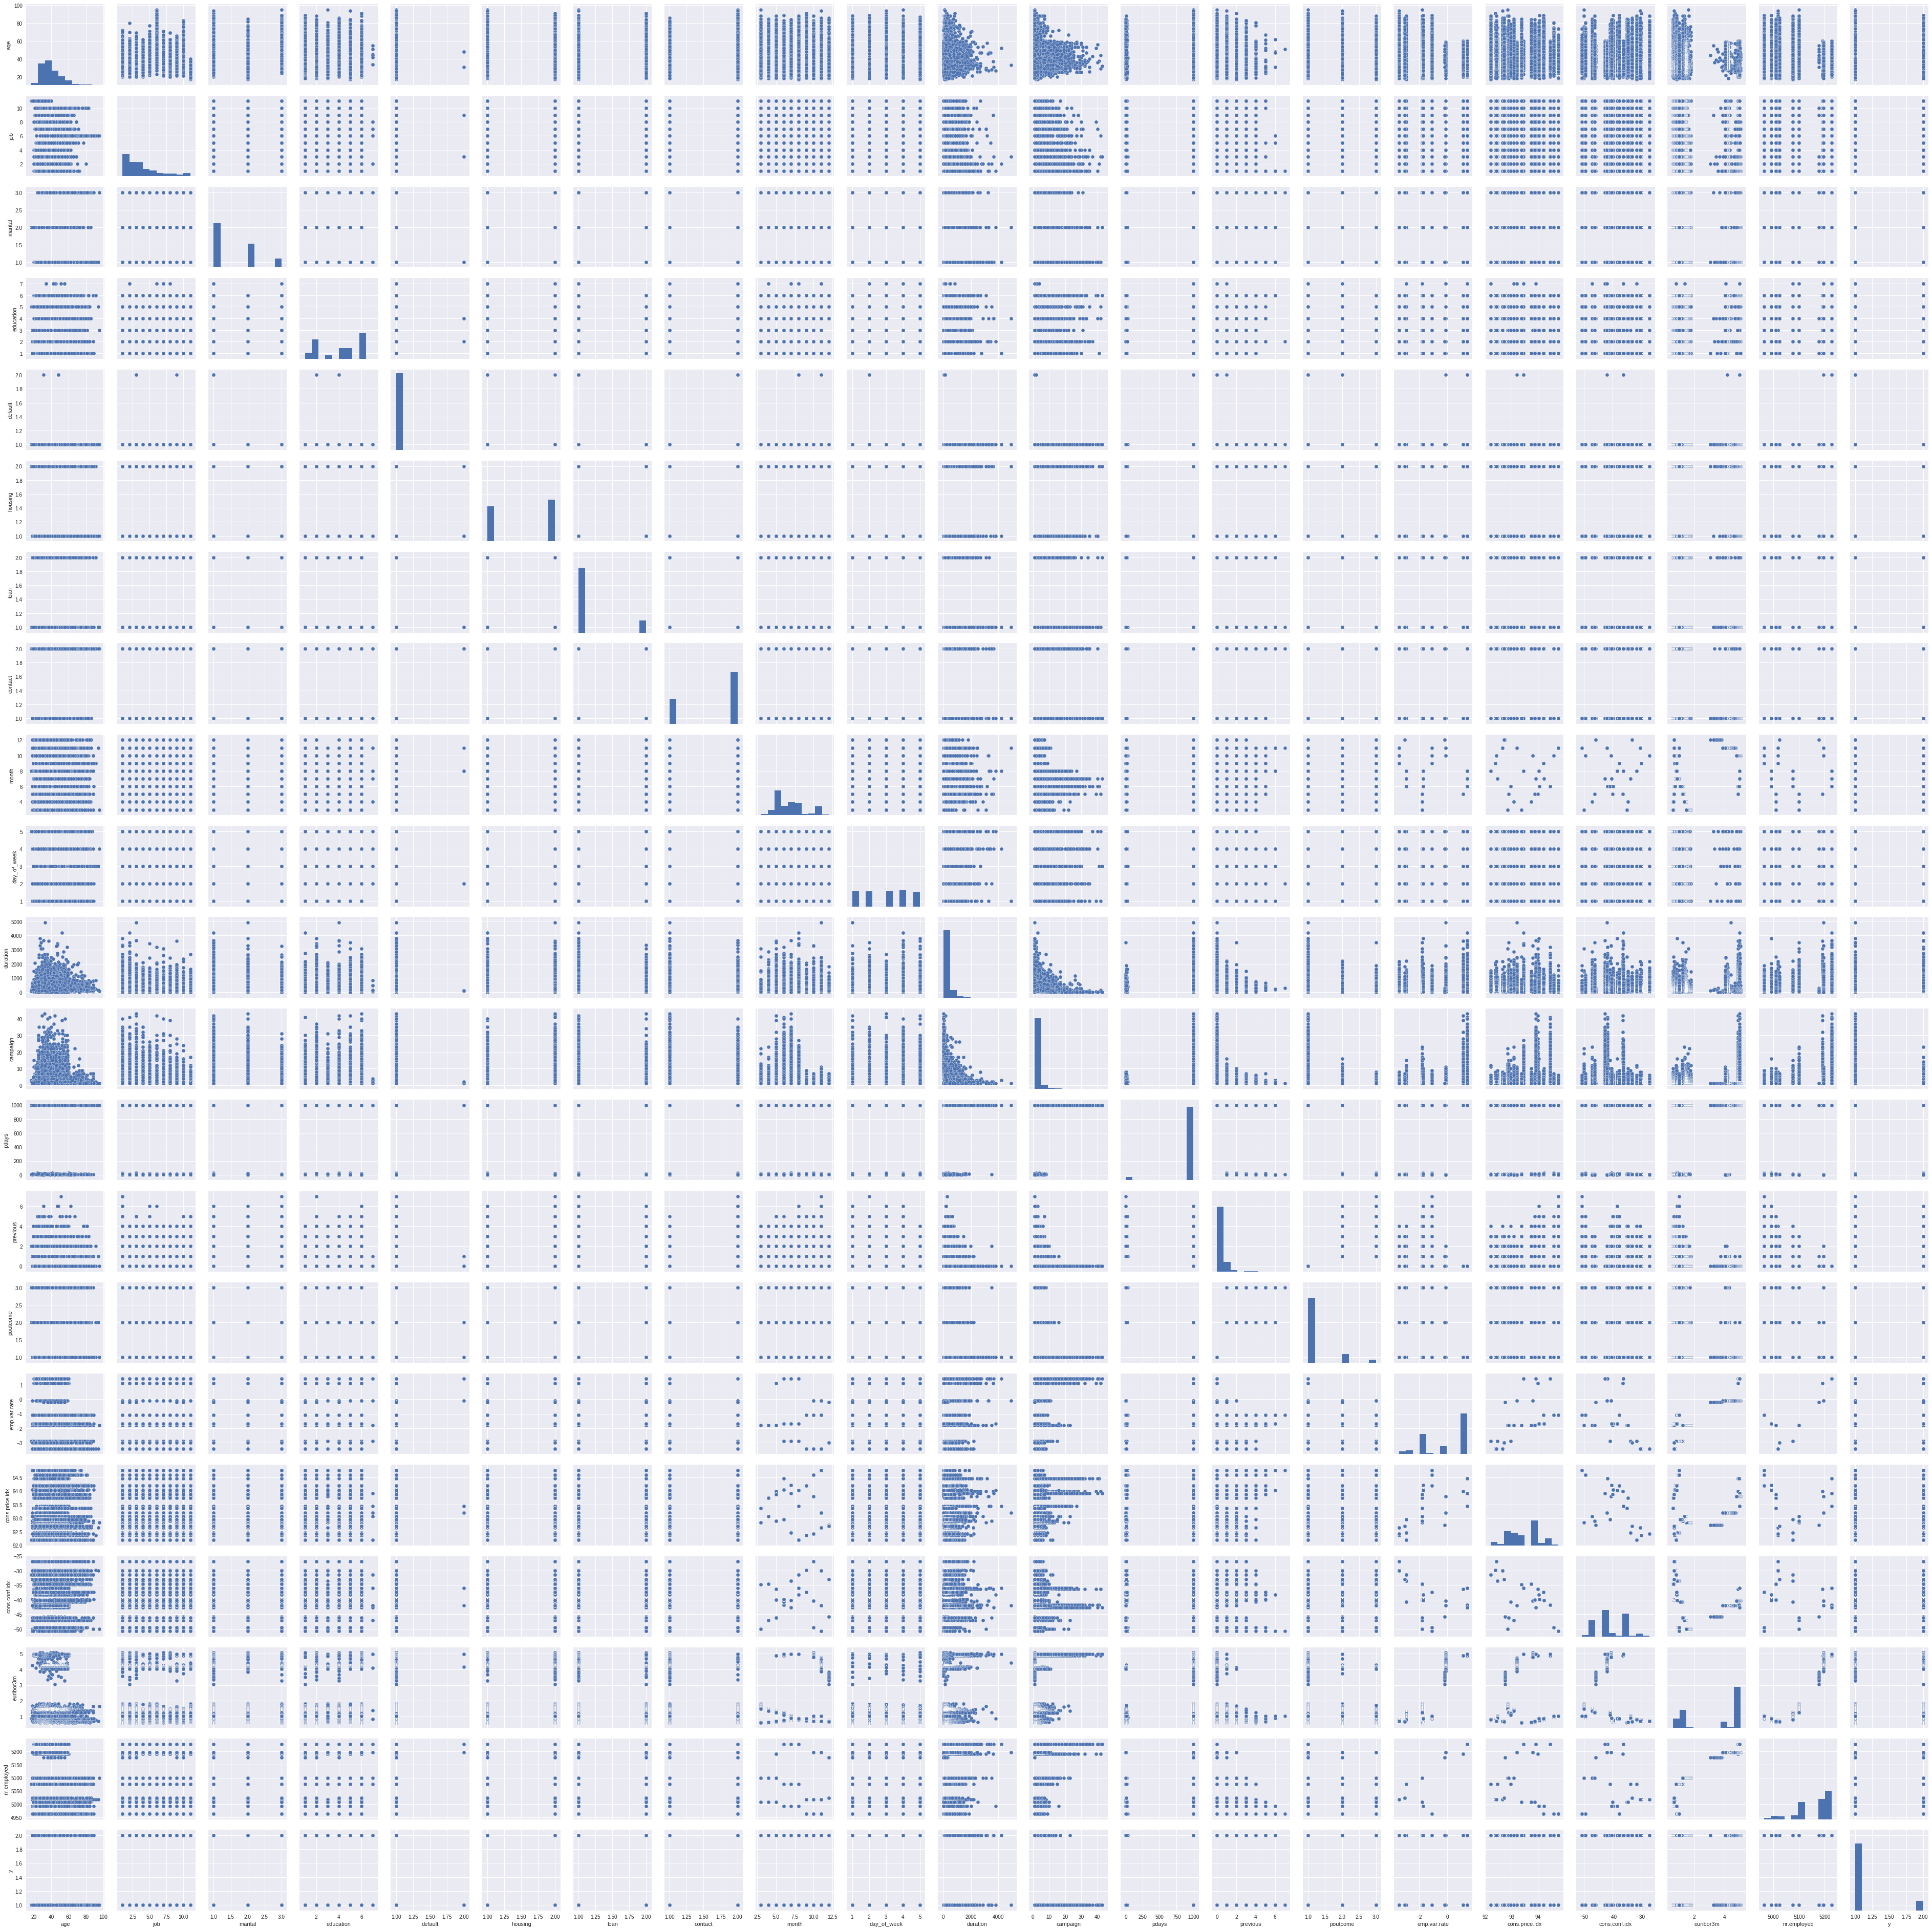

In [155]:
sns.pairplot(d_e)

In [242]:
d_e.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# ML algorithms with just train and test

In [ ]:
# for ensemble

In [7]:
endf = pd.DataFrame()
endf

Empty DataFrame
Columns: []
Index: []

# Logistic regression

In [8]:
#x_train, x_test, y_train, y_test = train_test_split(d_e[["age","poutcome","duration","job"]],d_e.y, test_size=9000, random_state=100)
x_train, x_test, y_train, y_test = train_test_split(d_e[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']],d_e.y, test_size=9000, random_state=100)

In [5]:

#x_train = x_train.reshape(-1,1)
#clf = skl_lm.LogisticRegression()
clf = skl_lm.LogisticRegression(penalty="l1",C =0.5,max_iter=1000)
clf.fit(x_train,y_train)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

classes:  [1 2]
coefficients:  [[ 0.00178107  0.02200526  0.03473559  0.07423283  0.         -0.00665149
   0.          0.89556075 -0.07045485  0.0123565   0.00424151 -0.03190937
  -0.00213398 -0.21061297 -0.20472758 -0.84773302  0.618338    0.03225384
   0.58522156 -0.0119493 ]]
intercept : [ 0.]


?skl_lm.LogisticRegression()

In [258]:
y_pred = clf.fit(x_train,y_train).predict(x_test)
confusion_matrix(y_pred,y_test)

array([[7658,  678],
       [ 223,  441]])

In [259]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          1       0.97      0.92      0.94      8336
          2       0.39      0.66      0.49       664

avg / total       0.93      0.90      0.91      9000



In [260]:
cohen_kappa_score(y_test, y_pred)

0.44310021146945722

In [261]:
#x_train, x_test, y_train, y_test = train_test_split(d_e[["age","poutcome","duration","job"]],d_e.y, test_size=9000, random_state=100)
x_train, x_test, y_train, y_test = train_test_split(d_e[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']],d_e.y, test_size=9000, random_state=100)

#x_train = x_train.reshape(-1,1)
#clf = skl_lm.LogisticRegression()
clf = skl_lm.LogisticRegression(penalty="l1",C =0.1,max_iter=1000)
clf.fit(x_train,y_train)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)
y_pred = clf.fit(x_train,y_train).predict(x_test)
confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))
cohen_kappa_score(y_test, y_pred)

classes:  [1 2]
coefficients:  [[ 0.00156509  0.02124846  0.02232655  0.07287574  0.          0.          0.
   0.81365358 -0.05805162  0.00879291  0.00423966 -0.03097597 -0.00205084
  -0.21736805 -0.15637245 -0.75470048  0.58816536  0.03349606  0.47402896
  -0.01132508]]
intercept : [ 0.]
             precision    recall  f1-score   support

          1       0.97      0.92      0.94      8336
          2       0.40      0.67      0.50       664

avg / total       0.93      0.90      0.91      9000



0.44557257457059163

In [263]:
#x_train, x_test, y_train, y_test = train_test_split(d_e[["age","poutcome","duration","job"]],d_e.y, test_size=9000, random_state=100)
x_train, x_test, y_train, y_test = train_test_split(d_e[["age",'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']],d_e.y, test_size=9000, random_state=100)

#x_train = x_train.reshape(-1,1)
#clf = skl_lm.LogisticRegression()
clf = skl_lm.LogisticRegression(penalty="l1",C =0.05,max_iter=1000)
clf.fit(x_train,y_train)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)
y_pred = clf.fit(x_train,y_train).predict(x_test)
confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))
cohen_kappa_score(y_test, y_pred)

classes:  [1 2]
coefficients:  [[ 0.00142633  0.02086388  0.00829987  0.07119632  0.          0.          0.
   0.6455902  -0.02856022  0.0031816   0.00423257 -0.0311128  -0.00197091
  -0.20924584 -0.11210132 -0.5171861   0.47662025  0.03789977  0.17404238
  -0.00906084]]
intercept : [ 0.]
             precision    recall  f1-score   support

          1       0.97      0.92      0.94      8345
          2       0.39      0.67      0.49       655

avg / total       0.93      0.90      0.91      9000



0.44014217823175139

# SVM

In [3]:
?SVC

In [9]:
model_1 = SVC(C = 1, kernel="linear", verbose=True, random_state=101)
model_1.fit(x_train, y_train)
print(model_1)
pred_1=model_1.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_1))

[LibSVM]SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=True)
[[7437  444]
 [ 535  584]]


In [10]:
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred_1))
met

0    1
0  7437  444
1   535  584

In [11]:
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)

Accuracy =  0.891222222222


In [12]:
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b

In [13]:
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

Kappa score =  0.482385966297


In [17]:
endf["SVM-1-linear"] = pred_1

In [18]:
model_1 = SVC(C = 2, kernel="linear", verbose=True, random_state=101)
model_1.fit(x_train, y_train)
print(model_1)
pred_1=model_1.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_1))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred_1))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[LibSVM]SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=True)
[[7431  450]
 [ 535  584]]
Accuracy =  0.890555555556
Kappa score =  0.480451983917


In [19]:
endf["SVM-2-linear"] = pred_1
endf.head()

SVM-1-linear  SVM-2-linear
0             2             2
1             1             1
2             1             1
3             2             2
4             1             1

In [20]:
model_1 = SVC(C = 5, kernel="linear", verbose=True, random_state=101)
model_1.fit(x_train, y_train)
print(model_1)
pred_1=model_1.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_1))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred_1))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[LibSVM]SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=True)
[[7443  438]
 [ 538  581]]
Accuracy =  0.891555555556
Kappa score =  0.482120602933


In [21]:
endf["SVM-5-linear"] = pred_1
endf.head()

SVM-1-linear  SVM-2-linear  SVM-5-linear
0             2             2             2
1             1             1             1
2             1             1             1
3             2             2             2
4             1             1             1

In [22]:
model_1 = SVC(C = 10, kernel="linear", verbose=True, random_state=101)
model_1.fit(x_train, y_train)
print(model_1)
pred_1=model_1.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_1))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred_1))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[LibSVM]SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=True)
[[7443  438]
 [ 540  579]]
Accuracy =  0.891333333333
Kappa score =  0.48064527435


In [23]:
endf["SVM-10-linear"] = pred_1
endf.head()

SVM-1-linear  SVM-2-linear  SVM-5-linear  SVM-10-linear
0             2             2             2              2
1             1             1             1              1
2             1             1             1              1
3             2             2             2              2
4             1             1             1              1

In [296]:
model_1 = SVC(C = 2, kernel="rbf", verbose=True, random_state=101)
model_1.fit(x_train, y_train)
print(model_1)
pred_1=model_1.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_1))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred_1))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[LibSVM]SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=True)
[[7799   82]
 [1044   75]]
Accuraccy =  0.874888888889
Kappa score =  0.089703299327


In [24]:
def sm(i):
    ks = []
    for x in i:
        model_1 = SVC(C = 0.5,degree = x, kernel="poly", verbose=True, random_state=101)
        model_1.fit(x_train, y_train)
        print(model_1)
        pred_1=model_1.predict(x_test)
        print(metrics.confusion_matrix(y_test, pred_1))
        met = pd.DataFrame(metrics.confusion_matrix(y_test, pred_1))
        met
        acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
        print("Accuracy = ",acc)
        a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        c = a+b
        kappa = (acc-c)/(1-c)
        print("Kappa score = {} for degree = {}".format(kappa,x))
    ks.append(kappa)
    plt.plot(range(len(i)),ks)
i = [1,2]
sm(i)

[LibSVM]SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=True)
[[7608  273]
 [ 670  449]]
Accuracy =  0.895222222222
Kappa score = 0.43242781260206853 for degree = 1
[LibSVM]SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=True)
[[7623  258]
 [ 634  485]]
Accuracy =  0.900888888889
Kappa score = 0.46817411613757653 for degree = 2


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

In [25]:
endf["SVM-0.5-poly-2"] = pred_1
endf.head()

SVM-1-linear  SVM-2-linear  SVM-5-linear  SVM-10-linear  SVM-0.5-poly-2
0             2             2             2              2               2
1             1             1             1              1               1
2             1             1             1              1               1
3             2             2             2              2               2
4             1             1             1              1               1

# TREES

In [2]:
?tree.DecisionTreeClassifier()

Object `tree.DecisionTreeClassifier` not found.


In [26]:
model_dt =tree.DecisionTreeClassifier(criterion='entropy', splitter="random")
model_dt.fit(x_train, y_train)
pred = model_dt.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7310  571]
 [ 519  600]]
Accuracy =  0.878888888889
Kappa score =  0.454675895707


In [27]:
endf["tree-ent-ran"] = pred
endf.head()

SVM-1-linear  SVM-2-linear  SVM-5-linear  SVM-10-linear  SVM-0.5-poly-2  \
0             2             2             2              2               2   
1             1             1             1              1               1   
2             1             1             1              1               1   
3             2             2             2              2               2   
4             1             1             1              1               1   

   tree-ent-ran  
0             1  
1             1  
2             1  
3             2  
4             1

In [28]:
model_dt =tree.DecisionTreeClassifier(criterion='gini', splitter="random")
model_dt.fit(x_train, y_train)
pred = model_dt.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7300  581]
 [ 549  570]]
Accuracy =  0.874444444444
Kappa score =  0.430381724898


In [29]:
model_dt =tree.DecisionTreeClassifier(criterion='entropy', splitter="best")
model_dt.fit(x_train, y_train)
pred = model_dt.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7339  542]
 [ 510  609]]
Accuracy =  0.883111111111
Kappa score =  0.469700508489


In [30]:
endf["tree-ent-best"] = pred
endf.head()

SVM-1-linear  SVM-2-linear  SVM-5-linear  SVM-10-linear  SVM-0.5-poly-2  \
0             2             2             2              2               2   
1             1             1             1              1               1   
2             1             1             1              1               1   
3             2             2             2              2               2   
4             1             1             1              1               1   

   tree-ent-ran  tree-ent-best  
0             1              2  
1             1              1  
2             1              1  
3             2              2  
4             1              1

In [31]:
model_dt =tree.DecisionTreeClassifier(criterion='gini', splitter="best")
model_dt.fit(x_train, y_train)
pred = model_dt.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7323  558]
 [ 519  600]]
Accuracy =  0.880333333333
Kappa score =  0.458533848422


In [32]:
endf["tree-gini-best"] = pred
endf.head()

SVM-1-linear  SVM-2-linear  SVM-5-linear  SVM-10-linear  SVM-0.5-poly-2  \
0             2             2             2              2               2   
1             1             1             1              1               1   
2             1             1             1              1               1   
3             2             2             2              2               2   
4             1             1             1              1               1   

   tree-ent-ran  tree-ent-best  tree-gini-best  
0             1              2               2  
1             1              1               1  
2             1              1               1  
3             2              2               2  
4             1              1               1

In [40]:
model_dt =tree.DecisionTreeClassifier(criterion='entropy', splitter="random", max_features="auto")
model_dt.fit(x_train, y_train)
pred = model_dt.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7287  594]
 [ 605  514]]
Accuracy =  0.866777777778
Kappa score =  0.385593683555


In [39]:
model_dt =tree.DecisionTreeClassifier(criterion='entropy', splitter="random", max_features="log2")
model_dt.fit(x_train, y_train)
pred = model_dt.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7292  589]
 [ 600  519]]
Accuracy =  0.867888888889
Kappa score =  0.390718006461


In [45]:
model_dt =tree.DecisionTreeClassifier(criterion='entropy', splitter="random", max_features="sqrt")
model_dt.fit(x_train, y_train)
pred = model_dt.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7323  558]
 [ 592  527]]
Accuracy =  0.872222222222
Kappa score =  0.405437916517


In [24]:
?RandomForestClassifier()

In [33]:
model_RF= RandomForestClassifier(criterion="entropy")
model_RF.fit(x_train, y_train)
pred = model_RF.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7604  277]
 [ 622  497]]
Accuracy =  0.900111111111
Kappa score =  0.471341909473


In [34]:
endf["rtree-ent"] = pred
endf.head()

SVM-1-linear  SVM-2-linear  SVM-5-linear  SVM-10-linear  SVM-0.5-poly-2  \
0             2             2             2              2               2   
1             1             1             1              1               1   
2             1             1             1              1               1   
3             2             2             2              2               2   
4             1             1             1              1               1   

   tree-ent-ran  tree-ent-best  tree-gini-best  rtree-ent  
0             1              2               2          2  
1             1              1               1          1  
2             1              1               1          1  
3             2              2               2          2  
4             1              1               1          1

In [35]:
model_RF= RandomForestClassifier(criterion="gini")
model_RF.fit(x_train, y_train)
pred = model_RF.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7608  273]
 [ 623  496]]
Accuracy =  0.900444444444
Kappa score =  0.471939518216


In [36]:
endf["rtree-gini"] = pred
endf.head()

SVM-1-linear  SVM-2-linear  SVM-5-linear  SVM-10-linear  SVM-0.5-poly-2  \
0             2             2             2              2               2   
1             1             1             1              1               1   
2             1             1             1              1               1   
3             2             2             2              2               2   
4             1             1             1              1               1   

   tree-ent-ran  tree-ent-best  tree-gini-best  rtree-ent  rtree-gini  
0             1              2               2          2           2  
1             1              1               1          1           1  
2             1              1               1          1           1  
3             2              2               2          2           2  
4             1              1               1          1           1

In [39]:
def rf(i):   
    ks=[]
    for x in i:
        model_RF= RandomForestClassifier(criterion="gini",n_estimators=x)
        model_RF.fit(x_train, y_train)
        pred = model_RF.predict(x_test)
        print(metrics.confusion_matrix(y_test, pred))
        met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
        met
        acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
        print("Accuracy = ",acc)
        a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        c = a+b
        kappa = (acc-c)/(1-c)
        print("Kappa score = {} for iterations = {}".format(kappa,x))
        ks.append(kappa)
        if(kappa>0.45):
            endf["rtree-gini-",x] = pred
    plt.plot(range(len(i)),ks)
i = [1,5,10,50,100,200,300,400,500,600,700,800,900,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
rf(i)

[[7357  524]
 [ 546  573]]
Accuracy =  0.881111111111
Kappa score = 0.4493654666035866 for iterations = [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
[[7502  379]
 [ 567  552]]
Accuracy =  0.894888888889
Kappa score = 0.4797885573279241 for iterations = [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
[[7609  272]
 [ 610  509]]
Accuracy =  0.902
Kappa score = 0.48293792871109276 for iterations = [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
[[7583  298]
 [ 556  563]]
Accuracy =  0.905111111111
Kappa score = 0.5163933590728343 for iterations = [1, 5, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
[[7579  302]
 [ 546  573]]
Accuracy =  0.905777777778
Kappa score = 0.52263451705211

In [40]:
endf.head()

SVM-1-linear  SVM-2-linear  SVM-5-linear  SVM-10-linear  SVM-0.5-poly-2  \
0             2             2             2              2               2   
1             1             1             1              1               1   
2             1             1             1              1               1   
3             2             2             2              2               2   
4             1             1             1              1               1   

   tree-ent-ran  tree-ent-best  tree-gini-best  rtree-ent  rtree-gini  \
0             1              2               2          2           2   
1             1              1               1          1           1   
2             1              1               1          1           1   
3             2              2               2          2           2   
4             1              1               1          1           1   

           ...           (rtree-gini-, 1500)  (rtree-gini-, 2000)  \
0          ...                             2                    2   
1          ...                             1                    1   
2          ...                             1                    1   
3          ...                             2                    2   
4          ...                             1                    1   

   (rtree-gini-, 3000)  (rtree-gini-, 4000)  (rtree-gini-, 5000)  \
0                    2                    2                    2   
1                    1                    1                    1   
2                    1                    1                    1   
3                    2                    2                    2   
4                    1                    1                    1   

   (rtree-gini-, 6000)  (rtree-gini-, 7000)  (rtree-gini-, 8000)  \
0                    2                    2                    2   
1                    1                    1                    1   
2                    1                    1                    1   
3                    2                    2                    2   
4                    1                    1                    1   

   (rtree-gini-, 9000)  (rtree-gini-, 10000)  
0                    2                     2  
1                    1                     1  
2                    1                     1  
3                    2                     2  
4                    1                     1  

[5 rows x 33 columns]

[[7377  504]
 [ 545  574]]
Accuracy =  0.883444444444
Kappa score = 0.456177252691119 for iterations = 1
[[7514  367]
 [ 565  554]]
Accuracy =  0.896444444444
Kappa score = 0.485360948614506 for iterations = 5
[[7578  303]
 [ 593  526]]
Accuracy =  0.900444444444
Kappa score = 0.48560596115329924 for iterations = 10
[[7590  291]
 [ 547  572]]
Accuracy =  0.906888888889
Kappa score = 0.5258573702020405 for iterations = 50
[[7590  291]
 [ 559  560]]
Accuracy =  0.905555555556
Kappa score = 0.5166017902036605 for iterations = 100
[[7572  309]
 [ 541  578]]
Accuracy =  0.905555555556
Kappa score = 0.5239249197860164 for iterations = 200
[[7580  301]
 [ 560  559]]
Accuracy =  0.904333333333
Kappa score = 0.5122218361458157 for iterations = 300
[[7585  296]
 [ 553  566]]
Accuracy =  0.905666666667
Kappa score = 0.5194292472303496 for iterations = 400
[[7582  299]
 [ 550  569]]
Accuracy =  0.905666666667
Kappa score = 0.5206524095732504 for iterations = 500
[[7584  297]
 [ 557  562]]
Accuracy

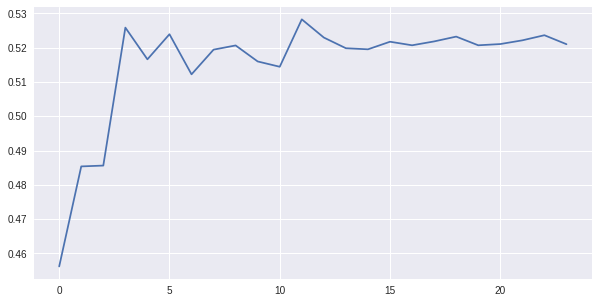

In [41]:
def rf(i):   
    global ks
    ks=[]
    for x in i:
        model_RF= RandomForestClassifier(criterion="entropy",n_estimators=x)
        model_RF.fit(x_train, y_train)
        pred = model_RF.predict(x_test)
        print(metrics.confusion_matrix(y_test, pred))
        met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
        met
        acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
        print("Accuracy = ",acc)
        a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        c = a+b
        kappa = (acc-c)/(1-c)
        print("Kappa score = {} for iterations = {}".format(kappa,x))
        ks.append(kappa)
        if(kappa>0.45):
            endf["rtree-ent-",x] = pred
    plt.figure(figsize=(10,5))  
    plt.plot(range(len(i)),ks)
i = [1,5,10,50,100,200,300,400,500,600,700,800,900,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
rf(i)

[[7344  537]
 [ 569  550]]
Accuracy =  0.877111111111
Kappa score = 0.4286302728144073 for iterations = 1
[[7470  411]
 [ 545  574]]
Accuracy =  0.893777777778
Kappa score = 0.4857625435030902 for iterations = 5
[[7593  288]
 [ 630  489]]
Accuracy =  0.898
Kappa score = 0.4608835167777984 for iterations = 10
[[7591  290]
 [ 572  547]]
Accuracy =  0.904222222222
Kappa score = 0.5068271824041432 for iterations = 50
[[7589  292]
 [ 553  566]]
Accuracy =  0.906111111111
Kappa score = 0.5208783632070871 for iterations = 100
[[7581  300]
 [ 540  579]]
Accuracy =  0.906666666667
Kappa score = 0.5279365996374102 for iterations = 200
[[7579  302]
 [ 557  562]]
Accuracy =  0.904555555556
Kappa score = 0.5141820386482612 for iterations = 300
[[7586  295]
 [ 547  572]]
Accuracy =  0.906444444444
Kappa score = 0.5244028770801726 for iterations = 400
[[7580  301]
 [ 550  569]]
Accuracy =  0.905444444444
Kappa score = 0.519930499926664 for iterations = 500
[[7583  298]
 [ 550  569]]
Accuracy =  0.905

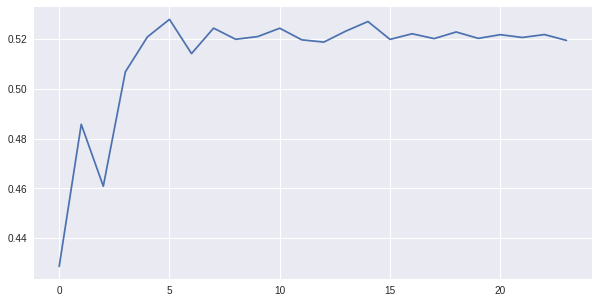

In [42]:
def rf(i):   
    global ks
    ks=[]
    for x in i:
        model_RF= RandomForestClassifier(criterion="entropy",n_estimators=x, max_features="sqrt")
        model_RF.fit(x_train, y_train)
        pred = model_RF.predict(x_test)
        print(metrics.confusion_matrix(y_test, pred))
        met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
        met
        acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
        print("Accuracy = ",acc)
        a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        c = a+b
        kappa = (acc-c)/(1-c)
        print("Kappa score = {} for iterations = {}".format(kappa,x))
        ks.append(kappa)
        if(kappa>0.45):
            endf["rtree-ent-sqrt",x] = pred
    plt.figure(figsize=(10,5))  
    plt.plot(range(len(i)),ks)
i = [1,5,10,50,100,200,300,400,500,600,700,800,900,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
rf(i)

[[7313  568]
 [ 559  560]]
Accuracy =  0.874777777778
Kappa score = 0.4269017505176697 for iterations = 1
[[7498  383]
 [ 569  550]]
Accuracy =  0.894222222222
Kappa score = 0.47692135248797535 for iterations = 5
[[7590  291]
 [ 612  507]]
Accuracy =  0.899666666667
Kappa score = 0.4745613197995533 for iterations = 10
[[7585  296]
 [ 568  551]]
Accuracy =  0.904
Kappa score = 0.507798694223357 for iterations = 50
[[7584  297]
 [ 546  573]]
Accuracy =  0.906333333333
Kappa score = 0.5244434917017361 for iterations = 100
[[7582  299]
 [ 547  572]]
Accuracy =  0.906
Kappa score = 0.5229533137076302 for iterations = 200
[[7583  298]
 [ 544  575]]
Accuracy =  0.906444444444
Kappa score = 0.5256108183269725 for iterations = 300
[[7579  302]
 [ 545  574]]
Accuracy =  0.905888888889
Kappa score = 0.523399025865872 for iterations = 400
[[7576  305]
 [ 546  573]]
Accuracy =  0.905444444444
Kappa score = 0.5215528001061467 for iterations = 500
[[7586  295]
 [ 543  576]]
Accuracy =  0.906888888889

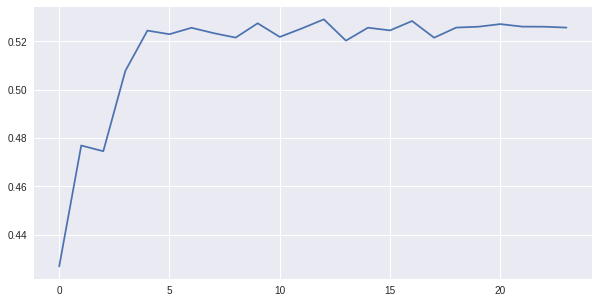

In [43]:
def rf(i):   
    global ks
    ks=[]
    for x in i:
        model_RF= RandomForestClassifier(criterion="gini",n_estimators=x, max_features="sqrt")
        model_RF.fit(x_train, y_train)
        pred = model_RF.predict(x_test)
        print(metrics.confusion_matrix(y_test, pred))
        met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
        met
        acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
        print("Accuracy = ",acc)
        a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        c = a+b
        kappa = (acc-c)/(1-c)
        print("Kappa score = {} for iterations = {}".format(kappa,x))
        ks.append(kappa)
        if(kappa>0.45):
            endf["rtree-gini-sqrt",x] = pred
    plt.figure(figsize=(10,5))  
    plt.plot(range(len(i)),ks)
i = [1,5,10,50,100,200,300,400,500,600,700,800,900,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
rf(i)

In [44]:
def rf(i):   
    global ks
    ks=[]
    for x in i:
        model_RF= RandomForestClassifier(criterion="gini",n_estimators=x, max_features="log2")
        model_RF.fit(x_train, y_train)
        pred = model_RF.predict(x_test)
        print(metrics.confusion_matrix(y_test, pred))
        met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
        met
        acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
        print("Accuracy = ",acc)
        a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        c = a+b
        kappa = (acc-c)/(1-c)
        print("Kappa score = {} for iterations = {}".format(kappa,x))
        ks.append(kappa)
        if(kappa>0.45):
            endf["rtree-gini-log2",x] = pred
    plt.figure(figsize=(10,5))  
    plt.plot(range(len(i)),ks)
i = [1,5,10,50,100,200,300,400,500,600,700,800,900,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
rf(i)

[[7313  568]
 [ 536  583]]
Accuracy =  0.877333333333
Kappa score = 0.44348798609526485 for iterations = 1
[[7474  407]
 [ 563  556]]
Accuracy =  0.892222222222
Kappa score = 0.4735510986500111 for iterations = 5
[[7581  300]
 [ 617  502]]
Accuracy =  0.898111111111
Kappa score = 0.46734645985794315 for iterations = 10
[[7585  296]
 [ 559  560]]
Accuracy =  0.905
Kappa score = 0.5147948783525502 for iterations = 50
[[7588  293]
 [ 543  576]]
Accuracy =  0.907111111111
Kappa score = 0.5281923861387888 for iterations = 100
[[7582  299]
 [ 550  569]]
Accuracy =  0.905666666667
Kappa score = 0.5206524095732504 for iterations = 200
[[7582  299]
 [ 544  575]]
Accuracy =  0.906333333333
Kappa score = 0.5252483763832375 for iterations = 300
[[7576  305]
 [ 539  580]]
Accuracy =  0.906222222222
Kappa score = 0.5268872657559434 for iterations = 400
[[7571  310]
 [ 543  576]]
Accuracy =  0.905222222222
Kappa score = 0.5220435244835493 for iterations = 500
[[7582  299]
 [ 552  567]]
Accuracy =  0.

[[7331  550]
 [ 576  543]]
Accuracy =  0.874888888889
Kappa score = 0.41964965256290476 for iterations = 1
[[7499  382]
 [ 575  544]]
Accuracy =  0.893666666667
Kappa score = 0.4726501798977412 for iterations = 5
[[7584  297]
 [ 607  512]]
Accuracy =  0.899555555556
Kappa score = 0.4764969927531897 for iterations = 10
[[7582  299]
 [ 570  549]]
Accuracy =  0.903444444444
Kappa score = 0.5051621063884392 for iterations = 50
[[7582  299]
 [ 553  566]]
Accuracy =  0.905333333333
Kappa score = 0.518345641649911 for iterations = 100
[[7590  291]
 [ 555  564]]
Accuracy =  0.906
Kappa score = 0.5196975116243421 for iterations = 200
[[7583  298]
 [ 549  570]]
Accuracy =  0.905888888889
Kappa score = 0.5217816147332665 for iterations = 300
[[7590  291]
 [ 544  575]]
Accuracy =  0.907222222222
Kappa score = 0.528156529221144 for iterations = 400
[[7580  301]
 [ 559  560]]
Accuracy =  0.904444444444
Kappa score = 0.5129956543356415 for iterations = 500
[[7577  304]
 [ 551  568]]
Accuracy =  0.905

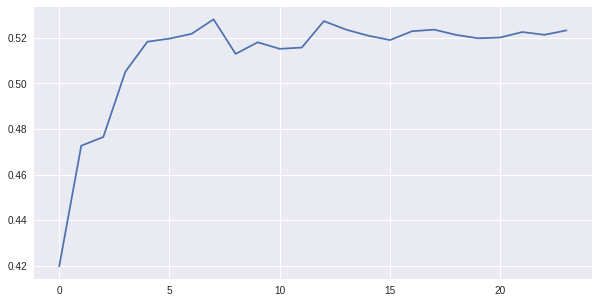

In [45]:
def rf(i):   
    global ks
    ks=[]
    for x in i:
        model_RF= RandomForestClassifier(criterion="entropy",n_estimators=x, max_features="log2")
        model_RF.fit(x_train, y_train)
        pred = model_RF.predict(x_test)
        print(metrics.confusion_matrix(y_test, pred))
        met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
        met
        acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
        print("Accuracy = ",acc)
        a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        c = a+b
        kappa = (acc-c)/(1-c)
        print("Kappa score = {} for iterations = {}".format(kappa,x))
        ks.append(kappa)
        if(kappa>0.45):
            endf["rtree-ent-log2",x] = pred
    plt.figure(figsize=(10,5))  
    plt.plot(range(len(i)),ks)
i = [1,5,10,50,100,200,300,400,500,600,700,800,900,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
rf(i)

# K-Nearest

In [27]:
?KNeighborsClassifier()

In [46]:
model_KNN = KNeighborsClassifier(n_neighbors=10, algorithm="kd_tree", weights = "distance") 
model_KNN.fit(x_train, y_train)
pred = model_KNN.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7514  367]
 [ 531  588]]
Accuracy =  0.900222222222
Kappa score =  0.511032621421


In [48]:
endf["KNN-kd"] = pred

In [49]:
model_KNN = KNeighborsClassifier(n_neighbors=10, algorithm="ball_tree", weights = "distance") 
model_KNN.fit(x_train, y_train)
pred = model_KNN.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7514  367]
 [ 531  588]]
Accuracy =  0.900222222222
Kappa score =  0.511032621421


In [50]:
endf["KNN-ball"] = pred

In [51]:
model_KNN = KNeighborsClassifier(n_neighbors=10, algorithm="brute", weights = "distance") 
model_KNN.fit(x_train, y_train)
pred = model_KNN.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[7514  367]
 [ 531  588]]
Accuracy =  0.900222222222
Kappa score =  0.511032621421


# Naive Bayes

In [21]:
?GaussianNB

In [38]:
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
pred = model_NB.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))
met = pd.DataFrame(metrics.confusion_matrix(y_test, pred))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

[[6780 1101]
 [ 491  628]]
Accuracy =  0.823111111111
Kappa score =  0.341619698253


# Ensemble 

In [ ]:
# best of all's output to find out majority (cut off-45% KS)

In [52]:
endf.shape

(9000, 151)

In [53]:
endf

SVM-1-linear  SVM-2-linear  SVM-5-linear  SVM-10-linear  SVM-0.5-poly-2  \
0                2             2             2              2               2   
1                1             1             1              1               1   
2                1             1             1              1               1   
3                2             2             2              2               2   
4                1             1             1              1               1   
5                1             1             1              1               1   
6                1             1             1              1               1   
7                1             1             1              1               1   
8                1             1             1              1               1   
9                1             1             1              1               1   
10               2             2             2              2               2   
11               1             1             1              1               1   
12               1             1             1              1               1   
13               1             1             1              1               1   
14               1             1             1              1               1   
15               1             1             1              1               1   
16               1             1             1              1               1   
17               1             1             1              1               1   
18               1             1             1              1               1   
19               1             1             1              1               1   
20               1             1             1              1               1   
21               1             1             1              1               1   
22               1             1             1              1               1   
23               1             1             1              1               1   
24               1             1             1              1               1   
25               1             1             1              1               1   
26               1             1             1              1               1   
27               1             1             1              1               1   
28               1             1             1              1               1   
29               1             1             1              1               1   
...            ...           ...           ...            ...             ...   
8970             2             2             2              2               2   
8971             1             1             1              1               1   
8972             1             1             1              1               1   
8973             1             1             1              1               1   
8974             2             2             2              2               2   
8975             1             1             1              1               1   
8976             1             1             1              1               1   
8977             1             1             1              1               1   
8978             1             1             1              1               1   
8979             1             1             1              1               1   
8980             1             1             1              1               1   
8981             1             1             1              1               1   
8982             1             1             1              1               1   
8983             1             1             1              1               1   
8984             1             1             1              1               1   
8985             1             1             1              1               1   
8986             1             1             1              1               1   
8987             2             2     

In [54]:
endf.to_excel("/media/radial/Work/Work/Work on datasets/Banco*/Ensemble-1.xlsx")

In [64]:
#endf["avg"] = 0
avg = []
for i in endf.index:
    #avg.append(sum(endf[i][8987]))
    avg.append(sum(endf.ix[i])/endf.shape[1])
avg

[1.9536423841059603,
 1.0,
 1.0,
 1.9933774834437086,
 1.0,
 1.0066225165562914,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0198675496688743,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0066225165562914,
 1.0066225165562914,
 1.0,
 1.0,
 1.0662251655629138,
 1.0,
 1.9801324503311257,
 1.0,
 1.0,
 1.0066225165562914,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.9470198675496688,
 1.0,
 1.0529801324503312,
 1.0,
 1.0397350993377483,
 1.0,
 1.0,
 1.6821192052980132,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.4768211920529801,
 1.0,
 1.0529801324503312,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0066225165562914,
 1.0,
 1.0,
 1.0,
 1.0,
 1.814569536423841,
 1.0,
 1.0596026490066226,
 1.0198675496688743,
 1.0,
 1.0794701986754967,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0066225165562914,
 1.0,
 1.0,
 1.9072847682119205,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0860927152317881,
 1.0,
 1.0,
 1.0132450331125828,
 1.0,
 1.0,
 1.95

In [103]:
avg_ro = copy.copy(avg)
for i in range(len(avg_ro)):
    if(avg_ro[i]>1.01):
        avg_ro[i]=2
    else:
        avg_ro[i] = 1
avg_ro

[2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,


In [104]:
met = pd.DataFrame(metrics.confusion_matrix(y_test, avg_ro))
met
acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
print("Accuracy = ",acc)
a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
c = a+b
kappa = (acc-c)/(1-c)
print("Kappa score = ",kappa)

Accuracy =  0.865555555556
Kappa score =  0.538858009173


In [73]:
# looks like these things are just 4% better than a coin toss. 

In [87]:
def bkp(x):
    kss = []
    max = 0
    for i in x.columns:
        col = x[i]
        met = pd.DataFrame(metrics.confusion_matrix(y_test, col))
        met
        acc= (met[0][0]+met[1][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1])
        #print("Accuracy = ",acc)
        a = ((met[0][0]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[0][0]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        b = ((met[1][1]+met[0][1])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))*((met[1][1]+met[1][0])/(met[0][0]+met[0][1]+met[1][0]+met[1][1]))
        c = a+b
        kappa = (acc-c)/(1-c)
        print("The alogrithm {} has Kappa score of {}".format(i,kappa))
        kss.append(kappa)
    return(kss)
ksss = bkp(endf)

The alogrithm SVM-1-linear has Kappa score of 0.48238596629745745
The alogrithm SVM-2-linear has Kappa score of 0.48045198391739546
The alogrithm SVM-5-linear has Kappa score of 0.4821206029333056
The alogrithm SVM-10-linear has Kappa score of 0.4806452743499304
The alogrithm SVM-0.5-poly-2 has Kappa score of 0.4806452743499304
The alogrithm tree-ent-ran has Kappa score of 0.45467589570734857
The alogrithm tree-ent-best has Kappa score of 0.4697005084893284
The alogrithm tree-gini-best has Kappa score of 0.45853384842165346
The alogrithm rtree-ent has Kappa score of 0.47134190947303506
The alogrithm rtree-gini has Kappa score of 0.4719395182155328
The alogrithm ('rtree-gini-', 5) has Kappa score of 0.4797885573279241
The alogrithm ('rtree-gini-', 10) has Kappa score of 0.48293792871109276
The alogrithm ('rtree-gini-', 50) has Kappa score of 0.5163933590728343
The alogrithm ('rtree-gini-', 100) has Kappa score of 0.5226345170521178
The alogrithm ('rtree-gini-', 200) has Kappa score of 0

The alogrithm ('rtree-ent-log2', 400) has Kappa score of 0.528156529221144
The alogrithm ('rtree-ent-log2', 500) has Kappa score of 0.5129956543356415
The alogrithm ('rtree-ent-log2', 600) has Kappa score of 0.518082520806059
The alogrithm ('rtree-ent-log2', 700) has Kappa score of 0.5152082846651594
The alogrithm ('rtree-ent-log2', 800) has Kappa score of 0.5157763963003358
The alogrithm ('rtree-ent-log2', 900) has Kappa score of 0.5273907939193963
The alogrithm ('rtree-ent-log2', 1000) has Kappa score of 0.5236774807429881
The alogrithm ('rtree-ent-log2', 1500) has Kappa score of 0.5210138239477271
The alogrithm ('rtree-ent-log2', 2000) has Kappa score of 0.5190677382717596
The alogrithm ('rtree-ent-log2', 3000) has Kappa score of 0.5229533137076302
The alogrithm ('rtree-ent-log2', 4000) has Kappa score of 0.5236358732136815
The alogrithm ('rtree-ent-log2', 5000) has Kappa score of 0.5213309489151867
The alogrithm ('rtree-ent-log2', 6000) has Kappa score of 0.5198376610155687
The alo

In [119]:
best = pd.DataFrame(ksss)
best.index = endf.columns
best.columns = ["Scores"]
best.sort_values("Scores",ascending=False)

Scores
(rtree-gini-sqrt, 900)    0.529095
(rtree-gini-sqrt, 3000)   0.528406
(rtree-ent-, 800)         0.528264
(rtree-gini-log2, 100)    0.528192
(rtree-ent-log2, 400)     0.528157
(rtree-ent-sqrt, 200)     0.527937
(rtree-gini-, 900)        0.527901
(rtree-gini-sqrt, 600)    0.527464
(rtree-ent-log2, 900)     0.527391
(rtree-gini-, 300)        0.527391
(rtree-gini-log2, 1500)   0.527175
(rtree-gini-, 600)        0.527175
(rtree-gini-log2, 4000)   0.527175
(rtree-gini-, 700)        0.527138
(rtree-gini-sqrt, 7000)   0.527138
(rtree-ent-sqrt, 1500)    0.527064
(rtree-gini-log2, 400)    0.526887
(rtree-gini-, 200)        0.526624
(rtree-gini-log2, 5000)   0.526526
(rtree-gini-log2, 800)    0.526127
(rtree-gini-log2, 900)    0.526127
(rtree-gini-sqrt, 8000)   0.526089
(rtree-gini-sqrt, 6000)   0.526051
(rtree-gini-sqrt, 9000)   0.526051
(rtree-gini-, 1000)       0.526012
(rtree-gini-log2, 8000)   0.525974
(rtree-gini-log2, 3000)   0.525974
(rtree-ent-, 50)          0.525857
(rtree-gini-sqrt, 10000)  0.525689
(rtree-gini-sqrt, 5000)   0.525689
...                            ...
(rtree-ent-log2, 500)     0.512996
(rtree-ent-, 300)         0.512222
KNN-kd                    0.511033
KNN-ball                  0.511033
(rtree-gini-sqrt, 50)     0.507799
(rtree-ent-sqrt, 50)      0.506827
(rtree-ent-log2, 50)      0.505162
(rtree-ent-sqrt, 5)       0.485763
(rtree-ent-, 10)          0.485606
(rtree-ent-, 5)           0.485361
(rtree-gini-, 10)         0.482938
SVM-1-linear              0.482386
SVM-5-linear              0.482121
SVM-0.5-poly-2            0.480645
SVM-10-linear             0.480645
SVM-2-linear              0.480452
(rtree-gini-, 5)          0.479789
(rtree-gini-sqrt, 5)      0.476921
(rtree-ent-log2, 10)      0.476497
(rtree-gini-sqrt, 10)     0.474561
(rtree-gini-log2, 5)      0.473551
(rtree-ent-log2, 5)       0.472650
rtree-gini                0.471940
rtree-ent                 0.471342
tree-ent-best             0.469701
(rtree-gini-log2, 10)     0.467346
(rtree-ent-sqrt, 10)      0.460884
tree-gini-best            0.458534
(rtree-ent-, 1)           0.456177
tree-ent-ran              0.454676

[151 rows x 1 columns]

# the closest to the ensemble model is a random forest with gini 